# May 13th

In [1]:
import tweepy
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from tweepy.auth import OAuthHandler

In [2]:
path = r'/home/edmundotome/Documents/Github Projects/LogAPItwitter.csv'
log = pd.read_csv(path)

In [3]:
consumerKey = log['API Key'][0]
consumerSecret = log['API Key Secret'][0]

accessToken = log['Access Token'][0]
accessTokenSecret = log['Access Token Secret'][0]

In [4]:
auth = OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
#gather 2000 tweets about Bitcoin and filter out any retweets 'RT'
search_term = '#bitcoin -filter:retweets'

#create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2021-05-13', tweet_mode='extended').items(2000)

#store tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [6]:
#create a dataframe to store the tweets with a column called 'tweets'
df = pd.DataFrame(all_tweets, columns=['Tweets'])
#show the first 5 rows of data
df.head(10)

,Tweets
0,📊 #crypto Stats 📊\n\n#Bitcoin = $43183\n#Ether...
1,Weekly Wrap – Commodity Watch (16-Jan-2022)\nT...
2,Give 3 best nft between those follow this acco...
3,@airdropinspect Good airdrop\n@chingching4166 ...
4,"Hello @cz_binance 💚 sir, When Binance Card Ava..."
5,Wondering if it'll upgrade when El Salvador be...
6,https://t.co/0ftusmBnh6\n\nCheck Out My NFTs C...
7,#XYOUSD - New Technical Analysis \n\nChart on ...
8,👋 A new block was found on the #Bitcoin networ...
9,Most #Bitcoin bros care more about twitter clo...


In [7]:
#create a function to clean the tweets 
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) #removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt)
  twt = re.sub('#BTC', 'Bitcoin', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #removes any strings with a '#'
  twt = re.sub('\\n', '', twt) #removes the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt) #removes any hyperlinks
  return twt

In [8]:
#clean the tweets
df['Cleaned Tweets'] = df['Tweets'].apply(cleanTwt)
#show the dataset
df.head()

,Tweets,Cleaned Tweets
0,📊 #crypto Stats 📊\n\n#Bitcoin = $43183\n#Ether...,📊 Stats 📊Bitcoin = $43183 = $3326.99 = $494.6...
1,Weekly Wrap – Commodity Watch (16-Jan-2022)\nT...,Weekly Wrap – Commodity Watch (16-Jan-2022)To ...
2,Give 3 best nft between those follow this acco...,Give 3 best nft between those follow this acco...
3,@airdropinspect Good airdrop\n@chingching4166 ...,@airdropinspect Good airdrop@chingching4166 @t...
4,"Hello @cz_binance 💚 sir, When Binance Card Ava...","Hello @cz_binance 💚 sir, When Binance Card Ava..."


In [9]:
#create a function to get subjetivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#create a function to get polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#create two new columns called 'Subjetivity' and 'Polarity'
df['Subjetivity'] = df['Cleaned Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Cleaned Tweets'].apply(getPolarity)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity
0,📊 #crypto Stats 📊\n\n#Bitcoin = $43183\n#Ether...,📊 Stats 📊Bitcoin = $43183 = $3326.99 = $494.6...,0.000000,0.000000
1,Weekly Wrap – Commodity Watch (16-Jan-2022)\nT...,Weekly Wrap – Commodity Watch (16-Jan-2022)To ...,0.550000,0.350000
2,Give 3 best nft between those follow this acco...,Give 3 best nft between those follow this acco...,0.300000,1.000000
3,@airdropinspect Good airdrop\n@chingching4166 ...,@airdropinspect Good airdrop@chingching4166 @t...,0.600000,0.700000
4,"Hello @cz_binance 💚 sir, When Binance Card Ava...","Hello @cz_binance 💚 sir, When Binance Card Ava...",0.400000,0.400000
5,Wondering if it'll upgrade when El Salvador be...,Wondering if it'll upgrade when El Salvador be...,0.000000,0.000000
6,https://t.co/0ftusmBnh6\n\nCheck Out My NFTs C...,Out My NFTs Collection In Opensea I Hope You ...,0.000000,0.000000
7,#XYOUSD - New Technical Analysis \n\nChart on ...,- New Technical Analysis Chart on TradingView...,0.277273,0.068182
8,👋 A new block was found on the #Bitcoin networ...,👋 A new block was found on the Bitcoin network...,0.284848,0.045455
9,Most #Bitcoin bros care more about twitter clo...,Most Bitcoin bros care more about twitter clou...,0.337500,0.300000


In [10]:
#create a function to get sentiment text 
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [11]:
#create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity,Sentiment
0,📊 #crypto Stats 📊\n\n#Bitcoin = $43183\n#Ether...,📊 Stats 📊Bitcoin = $43183 = $3326.99 = $494.6...,0.000000,0.000000,Neutral
1,Weekly Wrap – Commodity Watch (16-Jan-2022)\nT...,Weekly Wrap – Commodity Watch (16-Jan-2022)To ...,0.550000,0.350000,Positive
2,Give 3 best nft between those follow this acco...,Give 3 best nft between those follow this acco...,0.300000,1.000000,Positive
3,@airdropinspect Good airdrop\n@chingching4166 ...,@airdropinspect Good airdrop@chingching4166 @t...,0.600000,0.700000,Positive
4,"Hello @cz_binance 💚 sir, When Binance Card Ava...","Hello @cz_binance 💚 sir, When Binance Card Ava...",0.400000,0.400000,Positive
5,Wondering if it'll upgrade when El Salvador be...,Wondering if it'll upgrade when El Salvador be...,0.000000,0.000000,Neutral
6,https://t.co/0ftusmBnh6\n\nCheck Out My NFTs C...,Out My NFTs Collection In Opensea I Hope You ...,0.000000,0.000000,Neutral
7,#XYOUSD - New Technical Analysis \n\nChart on ...,- New Technical Analysis Chart on TradingView...,0.277273,0.068182,Positive
8,👋 A new block was found on the #Bitcoin networ...,👋 A new block was found on the Bitcoin network...,0.284848,0.045455,Positive
9,Most #Bitcoin bros care more about twitter clo...,Most Bitcoin bros care more about twitter clou...,0.337500,0.300000,Positive


/home/edmundotome/anaconda3/envs/Signal-Processing/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


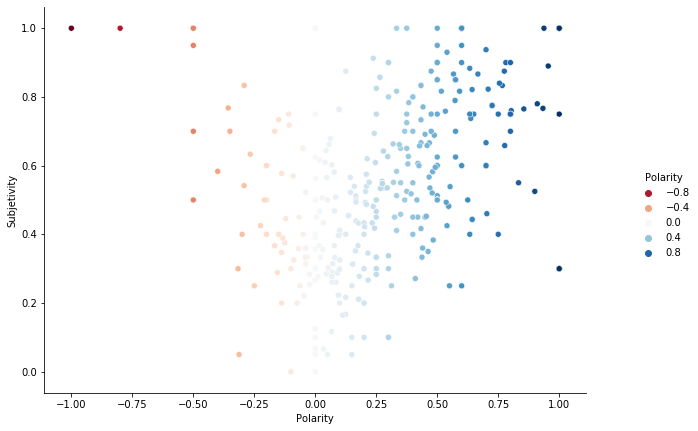

In [12]:
ax = sns.relplot(df['Polarity'], df['Subjetivity'], hue = df['Polarity'], palette='RdBu')
ax.fig.set_size_inches(10,6)

norm = plt.Normalize(df['Polarity'].min(), df['Polarity'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

plt.show()

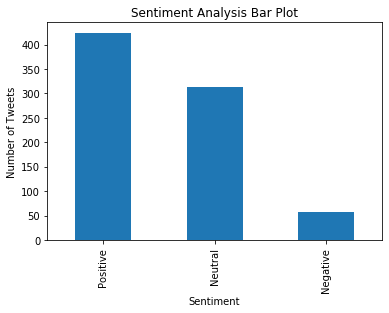

In [13]:
#create a barchar to show the count of positive, neutral and negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [14]:
df['Sentiment'].value_counts()

Positive    424
Neutral     314
Negative     58
Name: Sentiment, dtype: int64

In [ ]:
lst_df = list(df['Sentiment'].value_counts())
lst_df

In [ ]:
dfs = pd.read_csv("f_sentiments.csv")
  
# updating the column value/data
dfs.loc[3, 'Sentiment'] = 'day 4'
dfs.loc[3, 'Positive'] = lst_df[0]
dfs.loc[3, 'Neutral'] = lst_df[1]
dfs.loc[3, 'Negative'] = lst_df[2]
  
# writing into the file
dfs.to_csv("f_sentiments.csv", index=False)
  
print(dfs)

In [ ]:
#424 314 58